In [3]:
import json, random, pathlib, pandas as pd

DATA = pathlib.Path('HARP.jsonl')
records = [json.loads(l) for l in DATA.open()]

In [5]:
# Convert records list to pandas DataFrame
df = pd.DataFrame(records)
df.head()

,year,contest,number,level,subject,multiple_choice_only,problem,answer,solution_1,num_solutions,...,solution_5,solution_6,solution_7,solution_8,solution_9,solution_10,solution_11,solution_12,solution_13,solution_14
0,1950,AHSME,1,2,prealgebra,False,If $64$ is divided into three parts proportion...,$10\frac{2}{3}$,If the three numbers are in proportion to $2:4...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950,AHSME,2,2,algebra,False,"Let $R=gS-4$. When $S=8$, $R=16$. When $S=10$,...",$21$,Our first procedure is to find the value of $g...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950,AHSME,4,2,prealgebra,False,"Reduced to lowest terms, $\frac{a^{2}-b^{2}}{a...",$\frac{a}{b}$,We start off by factoring the second fraction....,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,AHSME,5,2,algebra,False,If five geometric means are inserted between $...,$648$,We can let the common ratio of the geometric s...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950,AHSME,6,2,algebra,False,The values of $y$ which will satisfy the equat...,$y^{2}+10y-7=0$,If we solve the second equation for $x$ in ter...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
l6_df = df[df['level'] == 6]
l6_df.columns

Index(['year', 'contest', 'number', 'level', 'subject', 'multiple_choice_only',
       'problem', 'answer', 'solution_1', 'num_solutions', 'solution_2',
       'solution_3', 'solution_4', 'solution_5', 'solution_6', 'solution_7',
       'solution_8', 'solution_9', 'solution_10', 'solution_11', 'solution_12',
       'solution_13', 'solution_14'],
      dtype='object')

In [9]:
l6_df['contest'].value_counts()

contest
AIME_I     75
AIME_II    72
AIME       50
Name: count, dtype: int64

In [17]:
l6_df['year'].value_counts()

year
2004    6
2014    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2015    6
2003    6
2016    6
2017    6
2018    6
2019    6
2020    6
2021    6
2023    6
2005    6
2024    6
2002    6
2001    6
2000    5
2022    5
2013    5
1991    3
1985    3
1986    3
1987    3
1988    3
1989    3
1990    3
1993    3
1992    3
1984    3
1994    3
1995    3
1996    3
1998    3
1999    3
1983    3
1997    2
Name: count, dtype: int64

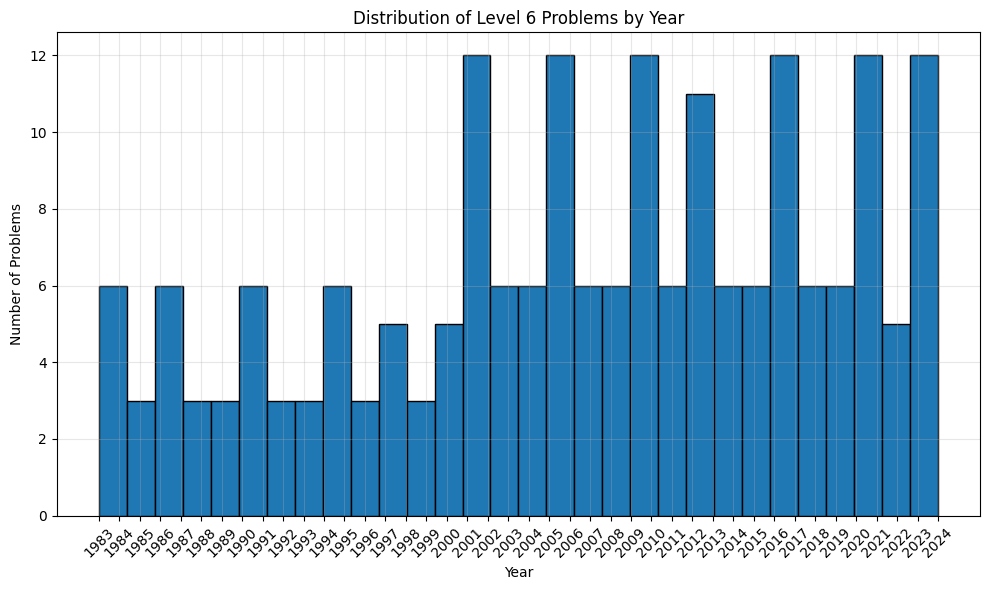

In [16]:
import matplotlib.pyplot as plt

# Create histogram of years
plt.figure(figsize=(10, 6))
l6_df['year'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Level 6 Problems by Year')
plt.xlabel('Year')
plt.ylabel('Number of Problems')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label cutoff

In [10]:
l5_df = df[df['level'] == 5]
l5_df['contest'].value_counts()

contest
AIME_II    75
AIME_I     74
AIME       48
Name: count, dtype: int64

In [11]:
df['contest'].value_counts()

contest
AHSME      1271
AMC_8       569
AMC_12B     484
AMC_12A     471
AIME_I      373
AIME_II     368
AMC_10B     335
AMC_10A     318
AJHSME      287
AIME        242
AMC_12       38
AMC_10       24
Name: count, dtype: int64

In [3]:
hard = [r for r in records if r["level"] >= 5]
print(len(hard))

394


In [2]:
import pandas as pd

l6 = pd.read_csv('../data/harp_level6.csv')

l6

,id,question,solution,answer
0,H6-001,"For $\{1, 2, 3, \ldots, n\}$ and each of its n...","Let $S$ be a non- empty subset of $\{1,2,3,4,5...",$448$
1,H6-002,"In the adjoining figure, two circles with radi...","Firstly, notice that if we reflect $R$ over $P...",$130$
2,H6-003,The adjoining figure shows two intersecting ch...,[asy] size(10cm); import olympiad; pair O = (0...,$175$
3,H6-004,Find the value of $10\cot(\cot^{-1}3+\cot^{-1}...,We know that $\tan(\arctan(x)) = x$ so we can ...,$15$
4,H6-005,What is the largest even integer that cannot b...,Take an even positive integer $x$. $x$ is eith...,$38$
...,...,...,...,...
192,H6-193,Let $ABCD$ be a tetrahedron such that $AB=CD= ...,"Notice that \(41=4^2+5^2\), \(89=5^2+8^2\), an...",$104$
193,H6-194,Let $\mathcal{B}$ be the set of rectangular bo...,"Observe that the ""worst"" possible box is one o...",$721$
194,H6-195,Let $\omega\neq 1$ be a 13th root of unity. Fi...,\[\prod_{k=0}^{12} \left(2- 2\omega^k + \omega...,$321$
195,H6-196,Let \(b\ge 2\) be an integer. Call a positive ...,We write the base-$b$ two-digit integer as $\l...,$211$


In [ ]:
l6['']